In [1]:
%tensorflow_version 2.0 

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
from tensorflow.keras.regularizers import L1L2
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime

**FUNCTIONS**

In [0]:
def getDataset():

  (train_images, train_label), (test_images, test_label) = cifar10.load_data()

  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                 'dog', 'frog', 'horse', 'ship', 'truck']

  return class_names, train_images, train_label, test_images, test_label

In [0]:
def history_model(history, modelName):
  
    plt.subplot(121)
    plt.plot(history['sparse_categorical_accuracy'])
    plt.plot(history['val_sparse_categorical_accuracy'])
    plt.title(modelName + ' Accuracy')
    plt.ylabel('sparse_categorical_accuracy')
    plt.xlabel('epochs')
    plt.ylim([0.0,1.0])
    plt.legend(['train_accuracy', 'val_sparse_categorical_accuracy'])

    plt.subplot(122)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title(modelName + ' Loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.ylim([0.0,3.0])
    plt.legend(['train_loss', 'val_loss'])

    plt.show()

In [0]:
def confusion(class_names, test_label, predict_one_hot):

    predict1D = []
    for pred in predict_one_hot:
      predict1D.append(pred.argmax())
    predict1D = np.array(predict1D)
    
    cm = tf.math.confusion_matrix(labels=test_label, predictions=predict1D, num_classes=len(class_names))
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, range(len(class_names)))
    plt.yticks(tick_marks, range(len(class_names)))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.show()

In [0]:
def plot_sample(class_names, train_images, train_label, augm=None):
    
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 4
    rows = 5

    for i in range(1, columns * rows +1):
        
        if augm is not None:
          img = augm.random_transform(train_images[i])
        else:
          img = train_images[i]

        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        
    plt.show()

In [0]:
def describe_dataset(dataset):

  for i in range(0, len(dataset[0])):

    print("Class ", i, ":", dataset[0][i])
    countClassInTrain = 0

    for j in range(0, dataset[1].shape[0]):

      if i == dataset[2][j]:

        if countClassInTrain == 0:
          plt.imshow(dataset[1][j])
          plt.show()
        countClassInTrain += 1

    print(dataset[0][i], " in train data: ", countClassInTrain, "/", dataset[1].shape[0])
    countClassInTest = 0

    for k in range(0, dataset[3].shape[0]):

      if i == dataset[4][k]:
        countClassInTest += 1

    print(dataset[0][i], " in test data: ", countClassInTest, "/", dataset[4].shape[0])
    print("\n")

**DATASET**

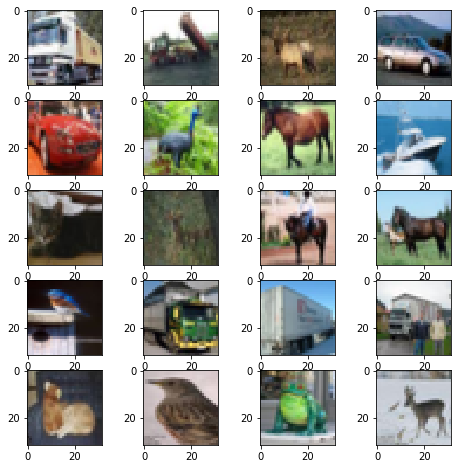

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
Class  0 : airplane


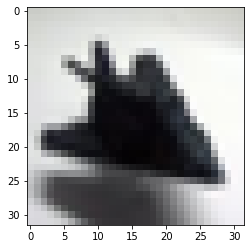

airplane  in train data:  5000 / 50000
airplane  in test data:  1000 / 10000


Class  1 : automobile


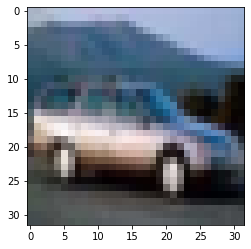

automobile  in train data:  5000 / 50000
automobile  in test data:  1000 / 10000


Class  2 : bird


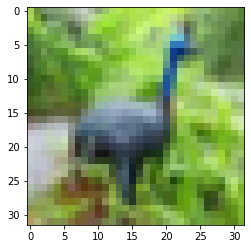

bird  in train data:  5000 / 50000
bird  in test data:  1000 / 10000


Class  3 : cat


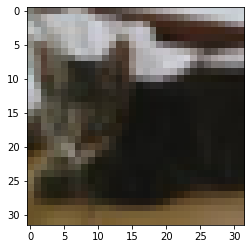

cat  in train data:  5000 / 50000
cat  in test data:  1000 / 10000


Class  4 : deer


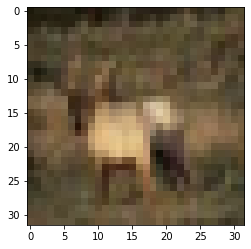

deer  in train data:  5000 / 50000
deer  in test data:  1000 / 10000


Class  5 : dog


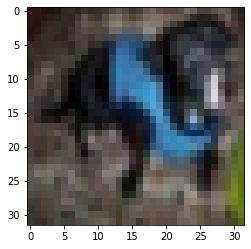

dog  in train data:  5000 / 50000
dog  in test data:  1000 / 10000


Class  6 : frog


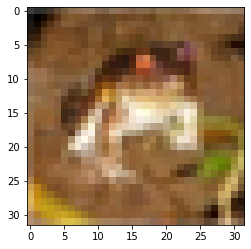

frog  in train data:  5000 / 50000
frog  in test data:  1000 / 10000


Class  7 : horse


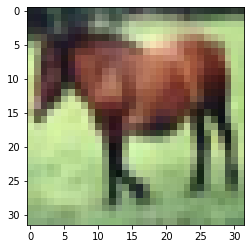

horse  in train data:  5000 / 50000
horse  in test data:  1000 / 10000


Class  8 : ship


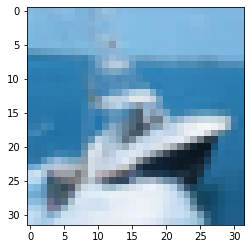

ship  in train data:  5000 / 50000
ship  in test data:  1000 / 10000


Class  9 : truck


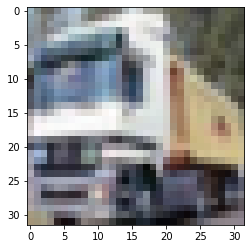

truck  in train data:  5000 / 50000
truck  in test data:  1000 / 10000




In [9]:
class_names, train_images, train_label, test_images, test_label = getDataset()

plot_sample(class_names, train_images, train_label)

print(train_images.shape, train_label.shape, test_images.shape, test_label.shape)

describe_dataset((class_names, train_images, train_label, test_images, test_label))

CALLBAKS

In [0]:
%load_ext tensorboard
log = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log, histogram_freq=1)

SIMPLE MULTILAYER

In [101]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(32, activation=relu))
    model.add(Dense(32, activation=relu))
    model.add(Dense(10, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)                98336     
_________________________________________________________________
dense_27 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                330       
Total params: 99,722
Trainable params: 99,722
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
EPOCHS = 100
BATCH_SIZE=128

In [0]:
# formate data
train_images = train_images / 255
test_images = test_images / 255

In [104]:
history = model.fit(train_images, train_label, validation_data=(test_images, test_label),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          callbacks=[tensorboard_callback])

model.save('saved_model/simple/')

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 57us/sample - loss: 2.1890 - sparse_categorical_accuracy: 0.1599 - val_loss: 2.1020 - val_sparse_categorical_accuracy: 0.1813
Epoch 2/100
50000/50000 [==============================] - 2s 44us/sample - loss: 2.0854 - sparse_categorical_accuracy: 0.1794 - val_loss: 2.0717 - val_sparse_categorical_accuracy: 0.1854
Epoch 3/100
50000/50000 [==============================] - 2s 43us/sample - loss: 2.0660 - sparse_categorical_accuracy: 0.1849 - val_loss: 2.0626 - val_sparse_categorical_accuracy: 0.1818
Epoch 4/100
50000/50000 [==============================] - 2s 45us/sample - loss: 2.0607 - sparse_categorical_accuracy: 0.1861 - val_loss: 2.0486 - val_sparse_categorical_accuracy: 0.1881
Epoch 5/100
50000/50000 [==============================] - 2s 42us/sample - loss: 2.0544 - sparse_categorical_accuracy: 0.1902 - val_loss: 2.0455 - val_sparse_categorical_accuracy: 0.1883
Epoch 6/10

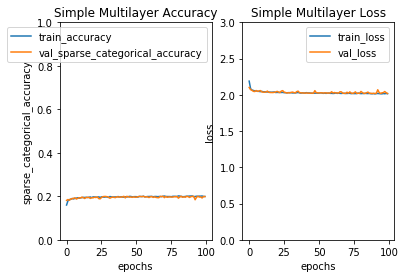

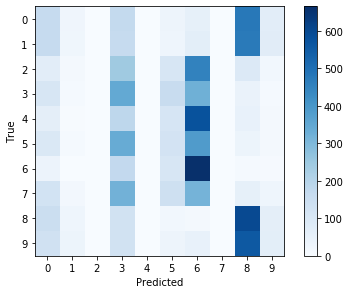

In [105]:
# evaluation
history_model(history.history, "Simple Multilayer")
pred = model.predict(test_images)
confusion(class_names, test_label, pred)

NEURAL AUGMENTATION

In [0]:
class_names, train_images, train_label, test_images, test_label = getDataset()

In [0]:
# format data
train_images = train_images / 255
test_images = test_images / 255

In [108]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(64, activation=relu))
    model.add(Dense(64, activation=relu))
    model.add(Dense(10, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                650       
Total params: 201,482
Trainable params: 201,482
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
EPOCHS = 100
BATCH_SIZE=128

In [110]:
history = model.fit(train_images, train_label, validation_data=(test_images, test_label),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          callbacks=[tensorboard_callback])

model.save('saved_model/neural_augm/')

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 49us/sample - loss: 1.9164 - sparse_categorical_accuracy: 0.3018 - val_loss: 1.7919 - val_sparse_categorical_accuracy: 0.3621
Epoch 2/100
50000/50000 [==============================] - 2s 43us/sample - loss: 1.7640 - sparse_categorical_accuracy: 0.3685 - val_loss: 1.7184 - val_sparse_categorical_accuracy: 0.3863
Epoch 3/100
50000/50000 [==============================] - 2s 42us/sample - loss: 1.7152 - sparse_categorical_accuracy: 0.3879 - val_loss: 1.7353 - val_sparse_categorical_accuracy: 0.3810
Epoch 4/100
50000/50000 [==============================] - 2s 43us/sample - loss: 1.6800 - sparse_categorical_accuracy: 0.4018 - val_loss: 1.6772 - val_sparse_categorical_accuracy: 0.3977
Epoch 5/100
50000/50000 [==============================] - 2s 45us/sample - loss: 1.6548 - sparse_categorical_accuracy: 0.4084 - val_loss: 1.6511 - val_sparse_categorical_accuracy: 0.4068
Epoch 6/10

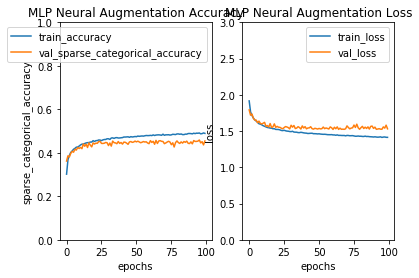

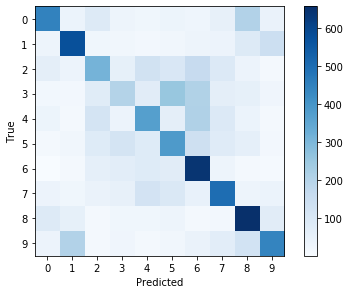

In [111]:
# evaluation
history_model(history.history, "MLP Neural Augmentation")
pred = model.predict(test_images)
confusion(class_names, test_label, pred)

LAYER AYGMENTATION

In [0]:
class_names, train_images, train_label, test_images, test_label = getDataset()

In [0]:
# format data
train_images = train_images / 255
test_images = test_images / 255

In [13]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(64, activation=relu))
    model.add(Dense(64, activation=relu))
    model.add(Dense(64, activation=relu))
    model.add(Dense(64, activation=relu))
    model.add(Dense(10, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                196672    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 209,802
Trainable params: 209,802
Non-trainable params: 0
__________________________________________________

In [0]:
EPOCHS = 100
BATCH_SIZE=128

In [15]:
history = model.fit(train_images, train_label, validation_data=(test_images, test_label),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          callbacks=[tensorboard_callback])

model.save('saved_model/layer_augm/')

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 93us/sample - loss: 1.8800 - sparse_categorical_accuracy: 0.3131 - val_loss: 1.7568 - val_sparse_categorical_accuracy: 0.3697
Epoch 2/100
50000/50000 [==============================] - 2s 49us/sample - loss: 1.7048 - sparse_categorical_accuracy: 0.3876 - val_loss: 1.6502 - val_sparse_categorical_accuracy: 0.4070
Epoch 3/100
50000/50000 [==============================] - 2s 50us/sample - loss: 1.6317 - sparse_categorical_accuracy: 0.4170 - val_loss: 1.6009 - val_sparse_categorical_accuracy: 0.4307
Epoch 4/100
50000/50000 [==============================] - 2s 48us/sample - loss: 1.5815 - sparse_categorical_accuracy: 0.4338 - val_loss: 1.5752 - val_sparse_categorical_accuracy: 0.4373
Epoch 5/100
50000/50000 [==============================] - 2s 50us/sample - loss: 1.5446 - sparse_categorical_accuracy: 0.4462 - val_loss: 1.6003 - val_sparse_categorical_accuracy: 0.4274
Epoch 6/10

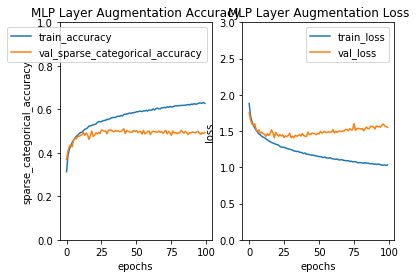

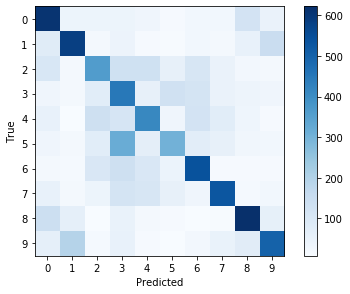

In [16]:
# evaluation
history_model(history.history, "MLP Layer Augmentation")
pred = model.predict(test_images)
confusion(class_names, test_label, pred)

ASCENDING DROPOUT

In [0]:
class_names, train_images, train_label, test_images, test_label = getDataset()

In [0]:
# format data
train_images = train_images / 255
test_images = test_images / 255

In [19]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(64, activation=relu))
    model.add(Dropout(0.01))
    model.add(Dense(64, activation=relu))
    model.add(Dropout(0.02))
    model.add(Dense(64, activation=relu))
    model.add(Dropout(0.03))
    model.add(Dense(64, activation=relu))
    model.add(Dropout(0.04))
    model.add(Dense(10, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                196672    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [0]:
EPOCHS = 100
BATCH_SIZE=128

In [21]:
history = model.fit(train_images, train_label, validation_data=(test_images, test_label),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          callbacks=[tensorboard_callback])

model.save('saved_model/dropout_asc/')

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 67us/sample - loss: 1.9441 - sparse_categorical_accuracy: 0.2864 - val_loss: 1.7912 - val_sparse_categorical_accuracy: 0.3613
Epoch 2/100
50000/50000 [==============================] - 3s 53us/sample - loss: 1.7708 - sparse_categorical_accuracy: 0.3595 - val_loss: 1.6682 - val_sparse_categorical_accuracy: 0.3990
Epoch 3/100
50000/50000 [==============================] - 2s 47us/sample - loss: 1.6985 - sparse_categorical_accuracy: 0.3898 - val_loss: 1.6486 - val_sparse_categorical_accuracy: 0.4063
Epoch 4/100
50000/50000 [==============================] - 2s 50us/sample - loss: 1.6618 - sparse_categorical_accuracy: 0.4014 - val_loss: 1.6040 - val_sparse_categorical_accuracy: 0.4285
Epoch 5/100
50000/50000 [==============================] - 2s 47us/sample - loss: 1.6246 - sparse_categorical_accuracy: 0.4179 - val_loss: 1.5799 - val_sparse_categorical_accuracy: 0.4315
Epoch 6/10

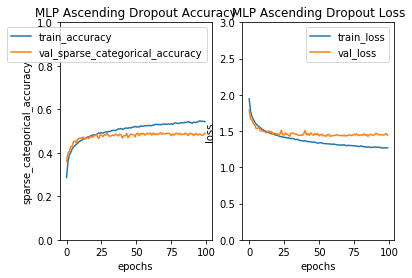

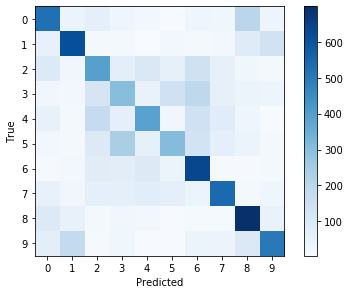

In [22]:
# evaluation
history_model(history.history, "MLP Ascending Dropout")
pred = model.predict(test_images)
confusion(class_names, test_label, pred)

DESCENDING DROPOUT

In [0]:
class_names, train_images, train_label, test_images, test_label = getDataset()

In [0]:
# format data
train_images = train_images / 255
test_images = test_images / 255

In [25]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(64, activation=relu))
    model.add(Dropout(0.03))
    model.add(Dense(64, activation=relu))
    model.add(Dropout(0.03))
    model.add(Dense(64, activation=relu))
    model.add(Dropout(0.02))
    model.add(Dense(64, activation=relu))
    model.add(Dropout(0.01))
    model.add(Dense(10, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                196672    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)               

In [0]:
EPOCHS = 100
BATCH_SIZE=128

In [27]:
history = model.fit(train_images, train_label, validation_data=(test_images, test_label),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          callbacks=[tensorboard_callback])

model.save('saved_model/dropout_desc/')

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 56us/sample - loss: 1.9563 - sparse_categorical_accuracy: 0.2765 - val_loss: 1.8577 - val_sparse_categorical_accuracy: 0.3233
Epoch 2/100
50000/50000 [==============================] - 2s 47us/sample - loss: 1.7939 - sparse_categorical_accuracy: 0.3478 - val_loss: 1.7180 - val_sparse_categorical_accuracy: 0.3762
Epoch 3/100
50000/50000 [==============================] - 2s 48us/sample - loss: 1.7323 - sparse_categorical_accuracy: 0.3727 - val_loss: 1.6667 - val_sparse_categorical_accuracy: 0.4065
Epoch 4/100
50000/50000 [==============================] - 2s 48us/sample - loss: 1.6928 - sparse_categorical_accuracy: 0.3911 - val_loss: 1.6462 - val_sparse_categorical_accuracy: 0.4087
Epoch 5/100
50000/50000 [==============================] - 2s 49us/sample - loss: 1.6628 - sparse_categorical_accuracy: 0.4020 - val_loss: 1.5872 - val_sparse_categorical_accuracy: 0.4275
Epoch 6/10

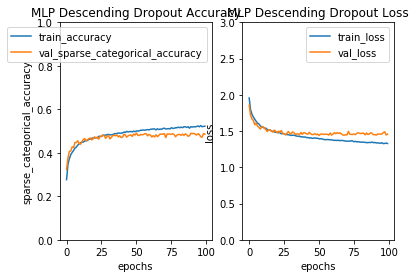

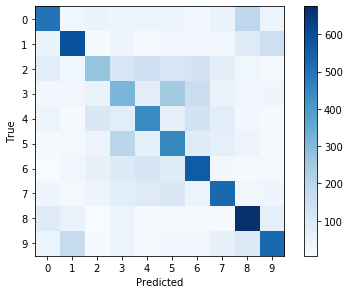

In [28]:
# evaluation
history_model(history.history, "MLP Descending Dropout")
pred = model.predict(test_images)
confusion(class_names, test_label, pred)

L2 REGULARIZER

In [0]:
class_names, train_images, train_label, test_images, test_label = getDataset()

In [0]:
# format data
train_images = train_images / 255
test_images = test_images / 255

In [74]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(64, activation=relu, kernel_regularizer=keras.regularizers.l2(l=0.01)))
    model.add(Dense(64, activation=relu, kernel_regularizer=keras.regularizers.l2(l=0.01)))
    model.add(Dense(64, activation=relu, kernel_regularizer=keras.regularizers.l2(l=0.01)))
    model.add(Dense(64, activation=relu, kernel_regularizer=keras.regularizers.l2(l=0.01)))
    model.add(Dense(10, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                650       
Total params: 209,802
Trainable params: 209,802
Non-trainable params: 0
________________________________________________

In [0]:
EPOCHS = 100
BATCH_SIZE=128

In [76]:
history = model.fit(train_images, train_label, validation_data=(test_images, test_label),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          callbacks=[tensorboard_callback])

model.save('saved_model/reg_l2/')

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 63us/sample - loss: 2.7125 - sparse_categorical_accuracy: 0.2658 - val_loss: 2.1594 - val_sparse_categorical_accuracy: 0.3120
Epoch 2/100
50000/50000 [==============================] - 2s 47us/sample - loss: 2.1005 - sparse_categorical_accuracy: 0.3252 - val_loss: 2.0220 - val_sparse_categorical_accuracy: 0.3501
Epoch 3/100
50000/50000 [==============================] - 2s 45us/sample - loss: 2.0212 - sparse_categorical_accuracy: 0.3405 - val_loss: 1.9677 - val_sparse_categorical_accuracy: 0.3475
Epoch 4/100
50000/50000 [==============================] - 2s 45us/sample - loss: 1.9802 - sparse_categorical_accuracy: 0.3485 - val_loss: 1.9418 - val_sparse_categorical_accuracy: 0.3522
Epoch 5/100
50000/50000 [==============================] - 2s 46us/sample - loss: 1.9507 - sparse_categorical_accuracy: 0.3529 - val_loss: 1.9244 - val_sparse_categorical_accuracy: 0.3553
Epoch 6/10

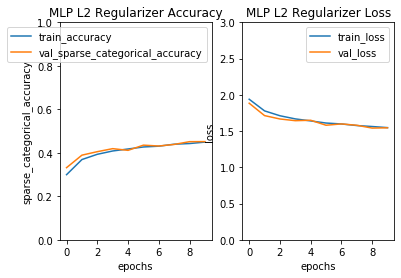

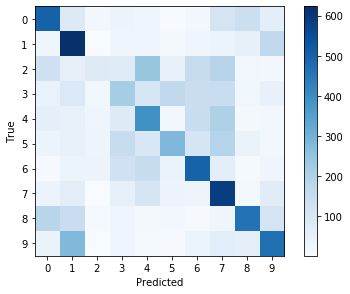

In [77]:
# evaluation
history_model(history.history, "MLP L2 Regularizer")
pred = model.predict(test_images)
confusion(class_names, test_label, pred)

L1L2 REGULARIZATION

In [0]:
class_names, train_images, train_label, test_images, test_label = getDataset()

In [0]:
#format data
train_images = train_images / 255
test_images = test_images / 255

In [31]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(64, activation=relu, kernel_regularizer=L1L2(l1=0.01, l2=0.01)))
    model.add(Dense(64, activation=relu, kernel_regularizer=L1L2(l1=0.01, l2=0.01)))
    model.add(Dense(10, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                650       
Total params: 201,482
Trainable params: 201,482
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
EPOCHS = 100
BATCH_SIZE=128

In [33]:
history = model.fit(train_images, train_label, validation_data=(test_images, test_label),
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          callbacks=[tensorboard_callback])

model.save('saved_model/reg_l1l2/')

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 57us/sample - loss: 5.5603 - sparse_categorical_accuracy: 0.1122 - val_loss: 2.5164 - val_sparse_categorical_accuracy: 0.1000
Epoch 2/100
50000/50000 [==============================] - 2s 48us/sample - loss: 2.5153 - sparse_categorical_accuracy: 0.0986 - val_loss: 2.5140 - val_sparse_categorical_accuracy: 0.1000
Epoch 3/100
50000/50000 [==============================] - 2s 49us/sample - loss: 2.5127 - sparse_categorical_accuracy: 0.0997 - val_loss: 2.5126 - val_sparse_categorical_accuracy: 0.1000
Epoch 4/100
50000/50000 [==============================] - 2s 48us/sample - loss: 2.5131 - sparse_categorical_accuracy: 0.0999 - val_loss: 2.5129 - val_sparse_categorical_accuracy: 0.1000
Epoch 5/100
50000/50000 [==============================] - 2s 48us/sample - loss: 2.5142 - sparse_categorical_accuracy: 0.0985 - val_loss: 2.5144 - val_sparse_categorical_accuracy: 0.1000
Epoch 6/10

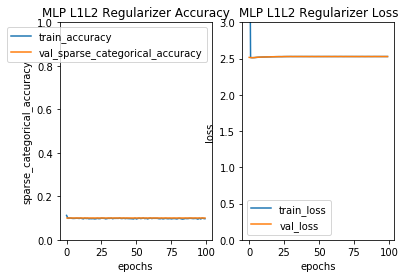

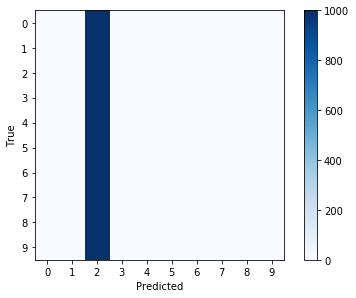

In [34]:
# evaluation
history_model(history.history, "MLP L1L2 Regularizer")
pred = model.predict(test_images)
confusion(class_names, test_label, pred)

DATA AUGMENTATION

In [0]:
class_names, train_images, train_label, test_images, test_label = getDataset()

In [0]:
# format data
train_images = train_images / 255
test_images = test_images / 255

In [0]:
# set augmentation parameters
aug = keras.preprocessing.image.ImageDataGenerator(
  rotation_range=25,
  zoom_range=0.1,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  horizontal_flip=True,
  fill_mode="nearest")

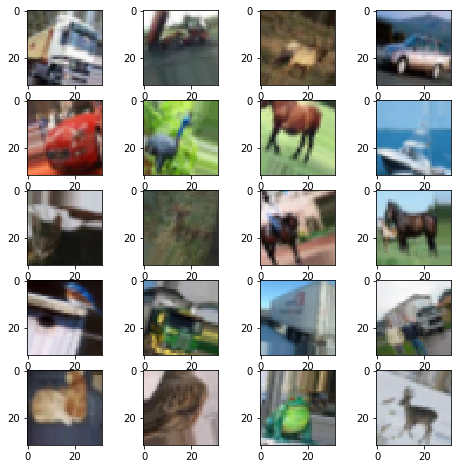

In [38]:
plot_sample(class_names, train_images, train_label, aug)

In [39]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(64, activation=relu))
    model.add(Dense(64, activation=relu))
    model.add(Dense(10, activation=softmax))
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=[sparse_categorical_accuracy])
    return model

model = create_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 201,482
Trainable params: 201,482
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
EPOCHS = 100
BATCH_SIZE=128

In [41]:
history = model.fit_generator(
	aug.flow(train_images, train_label, batch_size=BATCH_SIZE),
	validation_data=(test_images, test_label),
	epochs=EPOCHS)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 391 steps, validate on 10000 samples
Epoch 1/100
391/391 [==============================] - 24s 61ms/step - loss: 2.0630 - sparse_categorical_accuracy: 0.2345 - val_loss: 1.9088 - val_sparse_categorical_accuracy: 0.3033
Epoch 2/100
391/391 [==============================] - 23s 59ms/step - loss: 1.9470 - sparse_categorical_accuracy: 0.2878 - val_loss: 1.8099 - val_sparse_categorical_accuracy: 0.3540
Epoch 3/100
391/391 [==============================] - 23s 60ms/step - loss: 1.8956 - sparse_categorical_accuracy: 0.3116 - val_loss: 1.7902 - val_sparse_categorical_accuracy: 0.3479
Epoch 4/100
391/391 [==============================] - 24s 61ms/step - loss: 1.8700 - sparse_categorical_accuracy: 0.3239 - val_loss: 1.7332 - val_sparse_categorical_accuracy: 0.3765
Epoch 5/100
391/391 [==============================] - 23s 59ms/step - loss: 1.8465 - sparse_categorical_accuracy: 0.327

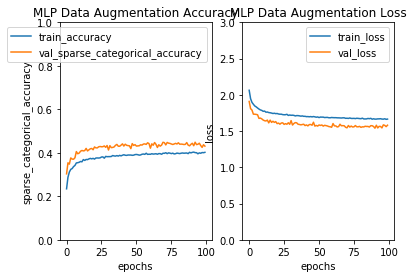

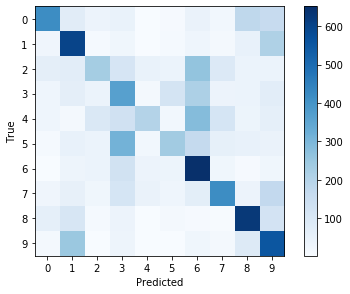

In [42]:
# evaluation
history_model(history.history, "MLP Data Augmentation")
pred = model.predict(test_images)
confusion(class_names, test_label, pred)